In [ ]:
I have used Root mean squared error (RMSE) as the evaluation metric since the target variable is continous variable.
RMSE is most commonly used evaluation metrics for regression problems beacause it brings down the unit of the differnce between
predicted and actual values to the same unit as the target variable. 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [80]:
data=pd.read_csv("nyc_taxi_trip_duration.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [81]:
data.shape

(729322, 11)

In [82]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [83]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [84]:
data['trip_duration_hour'] = data['trip_duration'].apply(lambda x: x/3600)
data.drop(columns=['trip_duration'], inplace=True)

In [85]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,0.111111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,0.305556
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,0.454167
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,0.316944
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,0.235556


In [86]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], format = '%Y-%m-%d %H')
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'], format = '%Y-%m-%d %H')

In [87]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_weekday'] = data['pickup_datetime'].dt.weekday
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_year'] = data['pickup_datetime'].dt.year
data['pickup_date'] = data['pickup_datetime'].dt.date

data['dropoff_hour'] = data['dropoff_datetime'].dt.hour
data['dropoff_weekday'] = data['dropoff_datetime'].dt.weekday
data['dropoff_day'] = data['dropoff_datetime'].dt.day
data['dropoff_month'] = data['dropoff_datetime'].dt.month
data['dropoff_year'] = data['dropoff_datetime'].dt.year
data['dropoff_date'] = data['dropoff_datetime'].dt.date

In [88]:
def time_of_day(x):
    # to calculate time 
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

data['pickup_time_of_day'] = data['pickup_hour'].apply(time_of_day)
data['dropoff_time_of_day'] = data['dropoff_hour'].apply(time_of_day)

In [89]:
data.drop(columns=['pickup_hour','pickup_weekday','pickup_day','pickup_month','pickup_year','dropoff_hour','dropoff_weekday','dropoff_day','dropoff_month','dropoff_year'], inplace=True)

In [90]:
#simple predictive model
data["trip_duration_hour_mean"]=data["trip_duration_hour"].mean()

In [91]:
data["trip_duration_hour_mean"].head()

0    0.264508
1    0.264508
2    0.264508
3    0.264508
4    0.264508
Name: trip_duration_hour_mean, dtype: float64

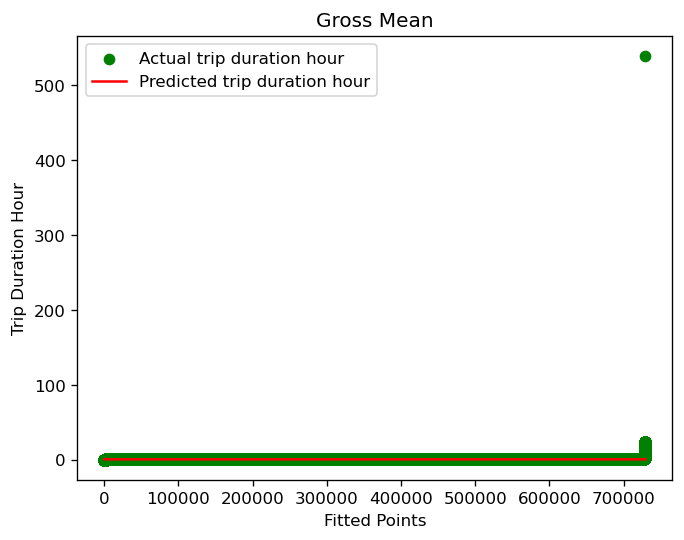

In [92]:
plt.figure(dpi=120)
k = range(0,len(data))
plt.scatter(k,data["trip_duration_hour"].sort_values(),color="green",label="Actual trip duration hour")
plt.plot(k,data["trip_duration_hour_mean"].sort_values(),color ="red",label="Predicted trip duration hour")
plt.xlabel("Fitted Points")
plt.ylabel("Trip Duration Hour")
plt.title("Gross Mean")
plt.legend()

In [93]:
# From above simple predictive model we can infer that the values of actual trip duration and predicted duration are almost same.

In [94]:
#From scikitlearn importing shuffle to shuffle data
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 40)

#Creating 4 divisions
div = int(data.shape[0]/4)

#Creating 3 parts for train set and 1 part for test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [95]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hour,pickup_date,dropoff_date,pickup_time_of_day,dropoff_time_of_day,trip_duration_hour_mean
111850,id3385449,2,2016-01-28 10:50:18,2016-01-28 11:49:04,1,-73.971672,40.750454,-73.982430,40.623718,N,0.979444,2016-01-28,2016-01-28,Morning,Morning,0.264508
469591,id0149835,1,2016-02-05 00:12:12,2016-02-05 00:20:33,1,-73.993820,40.740669,-73.972504,40.753811,Y,0.139167,2016-02-05,2016-02-05,Late night,Late night,0.264508
256857,id0996500,2,2016-01-26 12:19:42,2016-01-26 12:28:12,1,-73.946243,40.776466,-73.955566,40.777031,N,0.141667,2016-01-26,2016-01-26,Afternoon,Afternoon,0.264508
716018,id2057623,2,2016-06-06 19:03:38,2016-06-06 19:08:50,1,-73.968842,40.787781,-73.959480,40.806240,N,0.086667,2016-06-06,2016-06-06,Evening,Evening,0.264508
474191,id2305401,1,2016-01-27 05:59:51,2016-01-27 06:07:22,1,-73.976662,40.755486,-73.981544,40.759869,N,0.125278,2016-01-27,2016-01-27,Late night,Morning,0.264508


In [96]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hour,pickup_date,dropoff_date,pickup_time_of_day,dropoff_time_of_day,trip_duration_hour_mean
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,N,0.096111,2016-05-25,2016-05-25,Morning,Morning,0.264508
154849,id0267693,1,2016-05-05 17:55:52,2016-05-05 18:08:40,2,-73.987717,40.779442,-73.984131,40.766518,N,0.213333,2016-05-05,2016-05-05,Evening,Evening,0.264508
212092,id3996344,2,2016-04-23 22:23:05,2016-04-23 22:45:04,1,-73.952843,40.781517,-74.005219,40.720673,N,0.366389,2016-04-23,2016-04-23,Late night,Late night,0.264508
75068,id2200685,2,2016-02-13 22:55:30,2016-02-13 23:02:30,1,-73.977684,40.786919,-73.989174,40.777111,N,0.116667,2016-02-13,2016-02-13,Late night,Late night,0.264508
593333,id1212766,2,2016-01-02 10:09:12,2016-01-02 10:19:17,6,-73.976288,40.752018,-73.983536,40.765495,N,0.168056,2016-01-02,2016-01-02,Morning,Morning,0.264508


In [97]:
#Storing simple mean in a new column in the test set as "simple_mean"
data["trip_duration_hour_mean"]=data["trip_duration_hour"].mean()
data["trip_duration_hour_mean"]

111850    0.264508
469591    0.264508
256857    0.264508
716018    0.264508
474191    0.264508
            ...   
200211    0.264508
137031    0.264508
666892    0.264508
114369    0.264508
473253    0.264508
Name: trip_duration_hour_mean, Length: 729322, dtype: float64

In [98]:
#Calculating MSE
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

trip_mean_error = sqrt((mse(test['trip_duration_hour'] , test['trip_duration_hour_mean'])))
trip_mean_error

0.8560972301003034

In [99]:
#Trip duration mean with respect to the mean pickup time of the day.
pickup = pd.pivot_table(train, values='trip_duration_hour', index = ['pickup_time_of_day'], aggfunc=np.mean)
pickup

,trip_duration_hour
pickup_time_of_day,
Afternoon,0.289674
Evening,0.263445
Late night,0.260407
Morning,0.250434


In [100]:
#Initializing new column to zero
test['pickup'] = 0

#For every unique entry in pickup longitude
for i in train['pickup_time_of_day'].unique():
#Assign the mean value corresponding to unique entry
  test['pickup'][test['pickup_time_of_day'] == str(i)] = train['trip_duration_hour'][train['pickup_time_of_day'] == str(i)].mean()

In [101]:
#Calculating RMSE
pickup_error = sqrt(mse(test['trip_duration_hour'] , test['pickup'] ))
pickup_error

0.8559977153929387

In [102]:
#The RMSE of the mean trip duration hour with respect to the mean of pickup time of the day is higher than the simple mean of the trip duration hour

In [103]:
#Trip duration mean with respect to the mean of dropoff time of the day
dropoff =pd.pivot_table(train, values='trip_duration_hour', index = ['dropoff_time_of_day'], aggfunc=np.mean)
dropoff

,trip_duration_hour
dropoff_time_of_day,
Afternoon,0.281623
Evening,0.269520
Late night,0.260271
Morning,0.248318


In [104]:
#Initializing new column to zero
test['dropoff'] = 0

#For every unique entry in pickup latitude
for i in train['dropoff_time_of_day'].unique():
#Assign the mean value corresponding to unique entry
  test['dropoff'][test['dropoff_time_of_day'] == str(i)] = train['trip_duration_hour'][train['dropoff_time_of_day'] == str(i)].mean()

In [105]:
#Calculating Mean Absolute Error
dropoff_error = sqrt(mse(test['trip_duration_hour'] , test['dropoff'] ))
dropoff_error

0.8559877317265797

In [106]:
#The pick up time error is same as droppoff time error

In [107]:
#Mean trip duration with respect to the mean of passenger count
pass_count = pd.pivot_table(train, values='trip_duration_hour', index = ["passenger_count"], aggfunc=np.mean)
pass_count

,trip_duration_hour
passenger_count,
0,0.130764
1,0.256818
2,0.275949
3,0.287829
4,0.278673
5,0.297818
6,0.296994
7,0.005278
9,0.155556


In [108]:
#Creating an instance
test['pass_count'] = 0

#For every unique entry in passenger count
for i in train['passenger_count'].unique():
# Assign the mean value corresponding to unique entry
  test['pass_count'][test['passenger_count'] == str(i)] = train['trip_duration_hour'][train['passenger_count'] == str(i)].mean()

In [109]:
pass_count_error = sqrt(mse(test['trip_duration_hour'] , test['pass_count'] ))
pass_count_error

0.8956804722446243

In [110]:
#The pass_count_error is more than both pickup and dropoff error. 

In [111]:
store_and_fwd = pd.pivot_table(train, values='trip_duration_hour', index = ["store_and_fwd_flag"], aggfunc=np.mean)
store_and_fwd     

,trip_duration_hour
store_and_fwd_flag,
N,0.264559
Y,0.303472


In [112]:
#Creating an instance
test['store_and_fwd'] = 0

# For every unique entry in pickup latitude
for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd'][test['store_and_fwd_flag'] == str(i)] = train['trip_duration_hour'][train['store_and_fwd_flag'] == str(i)].mean()

In [113]:
str_and_fwd_error = sqrt(mse(test['store_and_fwd'] , test['trip_duration_hour'] ))
str_and_fwd_error

0.8560916279789967

In [114]:
combo = pd.pivot_table(train, values = 'trip_duration_hour', index = ['passenger_count','pickup_time_of_day','dropoff_time_of_day'], aggfunc = np.mean)
combo

trip_duration_hour
passenger_count pickup_time_of_day dropoff_time_of_day                    
0               Afternoon          Afternoon                      0.380486
                Evening            Evening                        0.074097
                                   Late night                     0.106944
                Late night         Late night                     0.026407
                Morning            Afternoon                      0.432222
...                                                                    ...
6               Morning            Afternoon                      0.376893
                                   Late night                    16.731944
                                   Morning                        0.264789
7               Morning            Morning                        0.005278
9               Morning            Morning                        0.155556

[76 rows x 1 columns]

In [116]:
#Conclusion
# 1.The simple mean error of trip duration hour is 0.87726 which is almost equal to rmse of pickup time 0.87716 and drofoff time of the day 0.87717. Whereas the str_and_fwd_error is 0.87726.

# 2.The rmse of passanger count is slightly higher 0.91623.

# 3.The passenger count error is more than both pickup and dropoff error. 